# Roomba Simulation

In [170]:
import agentpy as ap
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

## Constants

In [171]:
# Dirt Constants
CLEAN = 0
DIRTY = 1

# Direction Constants
STATIC = [0,0]
UP = [0,1]
DOWN = [0,-1]
LEFT = [-1, 0]
RIGHT = [1,0]
UP_LEFT = [-1,-1]
DOWN_LEFT = [-1,-1]
UP_RIGHT = [1,1]
DOWN_RIGHT = [1,-1]

## Plotter Function

In [172]:
def plot(title, data):
    cmap = colors.ListedColormap(['White','Sienna'])
    plt.figure(figsize=(6,6))
    plt.title(title)
    plt.pcolor(data[::-1],cmap=cmap, edgecolors='k', linewidths=3)
    plt.xticks([])
    plt.yticks([])
    plt.show()

## Model definition

In [173]:
class RoombaAgent(ap.Agent):
    def setup(self):
        self.position = [1,1] # Set initial position
        self.moves = 0 # Step Counter

    def move(self):
        directions = [ UP, DOWN, LEFT, RIGHT, UP_LEFT, DOWN_LEFT, UP_RIGHT, DOWN_RIGHT ] # Set Posible Movements
        random_direction = random.choice(directions) # Get a random direction for step
        new_position = [self.position[0] + random_direction[0], self.position[1] + random_direction[1]] # Calculate new position adding the new coordinates from random_direction
        if(all(-1 < i <= self.model.grid_size[x]-1 for x, i in enumerate(new_position))): # Checks if for every coordinate from new_positions its a valid coordinate
            self.position = new_position # Replaces old position from new position
            self.moves+=1 # Register a step


In [174]:
manual_results = {}

class RoombaModel(ap.Model):
    def setup(self):
        self.grid_size = self.p.grid_size
        self.agents = ap.AgentList(self, self.p.agents, RoombaAgent)
        self.dirty_cells = np.random.choice([CLEAN,DIRTY], self.grid_size, p=[1-self.p.dirty_percentage, self.p.dirty_percentage])
        #plot(f"Original Board", self.dirty_cells)
        #print(self.dirty_cells)

    def step(self):
        cleaned_cells = 0
        for agent in self.agents:
            if(self.dirty_cells[tuple(agent.position)]):
                self.dirty_cells[tuple(agent.position)] = CLEAN
                cleaned_cells+=1
            self.record("Time-Series", cleaned_cells)
            agent.move()

    def end(self):
        cleaned_cells = np.count_nonzero(self.dirty_cells == CLEAN)
        percentage_cleaned = cleaned_cells / np.prod(self.grid_size) * 100
        total_moves = sum(agent.moves for agent in self.agents)
        manual_results["dirty_cells"] = self.dirty_cells
        manual_results["cleaned_cells"] = cleaned_cells
        manual_results["percentage_cleaned"] = percentage_cleaned
        manual_results["total_moves"] = total_moves
        print(self.dirty_cells)

## Simulation run

In [175]:
parameters = {
    "agents": 5,
    "grid_size": [5,5],
    "dirty_percentage": 1,
    "max_steps": 100
}

In [176]:
model = RoombaModel(parameters)
results = model.run(steps=parameters['max_steps'])

Completed: 100 steps[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

Run time: 0:00:00.005004
Simulation finished


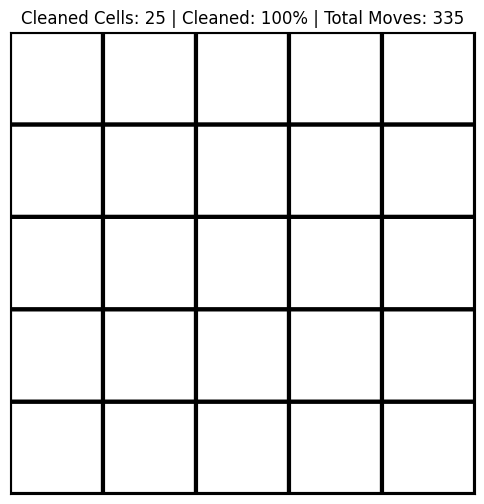

In [177]:
plot(f"Cleaned Cells: {manual_results['cleaned_cells']} | Cleaned: {round(manual_results['percentage_cleaned'])}% | Total Moves: {manual_results['total_moves']}", manual_results["dirty_cells"])

In [178]:
results.variables.RoombaModel.head()

,Time-Series
t,
1,1
2,4
3,1
4,0
5,1


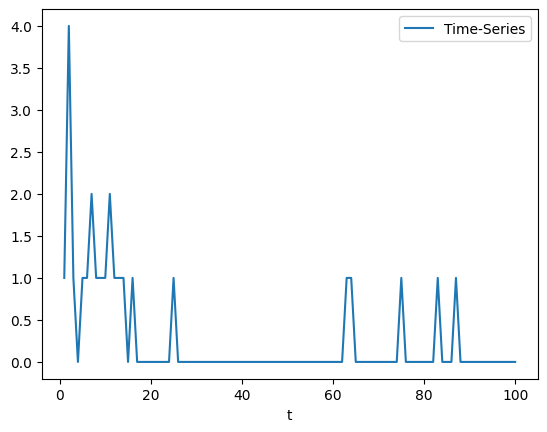

In [179]:
data = results.variables.RoombaModel
ax = data.plot()